使用Scrapy框架抓取豆瓣电影TOP250信息（https://movie.douban.com/top250）.

获取影片信息后对数据进行清洗，手动填补遗漏的电影信息等。

整理完毕后具体信息如下


- Rank:排名(1-250)
- title:电影片名
- Score:得分（0-10）
- MovieTypes:影片类型
- Year:上映时间
- Last:影片时长
- CountryOrRegion:制片国家或地区
- Votes:参与投票人数
- Direction:导演
- ScreenWriter:编剧
- Actors:主要演员
- Comment:一句话评价
- OriginalTitle:电影的原始片名
- Url:影片对应的链接

In [1]:
# Author : CuiCheng
# Created: 2017-10-03
# E-mail: cuic@lreis.ac.cn

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# 指定作图的风格
plt.style.use('seaborn')
# 支持中文字符和负号
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
filepath = './doubanMovies.xlsx'
movies = pd.read_excel(filepath)
# 查看记录数和字段数
print(movies.shape)

(250, 14)


In [4]:
# 具体查看某一条电影的信息
movies.iloc[10]

Rank                                                      11
Title                                                  海上钢琴师
Score                                                    9.2
MovieTypes                                             剧情 音乐
Year                                                    1998
Last                                                     165
CountryOrRegion                                          意大利
Votes                                                 597778
OriginalTitle           La leggenda del pianista sull'oceano
Direction                                           朱塞佩·托纳多雷
ScreenWriter                              亚利桑德罗·巴里克 朱塞佩·托纳多雷
Actors               蒂姆·罗斯 普路特·泰勒·文斯 比尔·努恩 梅兰尼·蒂埃里 阿尔贝托·巴斯克斯
Comment                            每个人都要走一条自己坚定了的路，就算是粉身碎骨。 
Url                https://movie.douban.com/subject/1292001/
Name: 10, dtype: object

## 电影评分

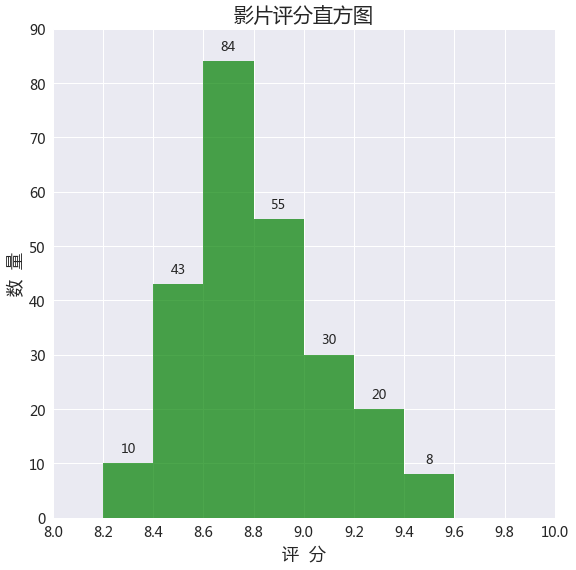

In [23]:
fig, ax = plt.subplots(figsize=(9,9))
n,bins,pathces=ax.hist(movies['Score'],bins=7,facecolor='g',alpha=0.7)
ax.set_xticks(np.linspace(8,10,11))
ax.set_ylim(ymax=90)
ax.set_yticklabels(np.arange(0,91,10),size=14)
ax.set_xticklabels(np.linspace(8,10,11),size=14)
for i in range(len(n)): 
    ax.text(bins[i]+0.1,n[i]+2,int(n[i]),fontsize=13,horizontalalignment='center')
ax.set_xlabel('评  分',fontsize=17)
ax.set_ylabel('数  量',fontsize=17)
title='影片评分直方图'
ax.set_title(title,fontsize=20)
fig.savefig(title)
plt.show()

果不其然，入选豆瓣电影TOP250的评分都高达8分以上，整体质量很高。

## 电影类型

在分析之前，需要对每部电影所属的类型进行展开，形成0-1矩阵。

In [6]:
genres_iter = (set(x.split()) for x in movies['MovieTypes'])
genres = set.union(*genres_iter)

In [7]:
dummies = pd.DataFrame(np.zeros((len(movies),len(genres))),columns=genres)
for i,gen in enumerate(movies.MovieTypes):
    dummies.loc[i,gen.split()]=1
movies_genres = movies.join(dummies.add_prefix('Genre_'))

In [8]:
typedict = {column[6:]:movies_genres[column].sum() for column in movies_genres.columns if column.startswith('Genre_')}
typedict=dict(sorted(typedict.items(),key = lambda d:d[1],reverse=True))

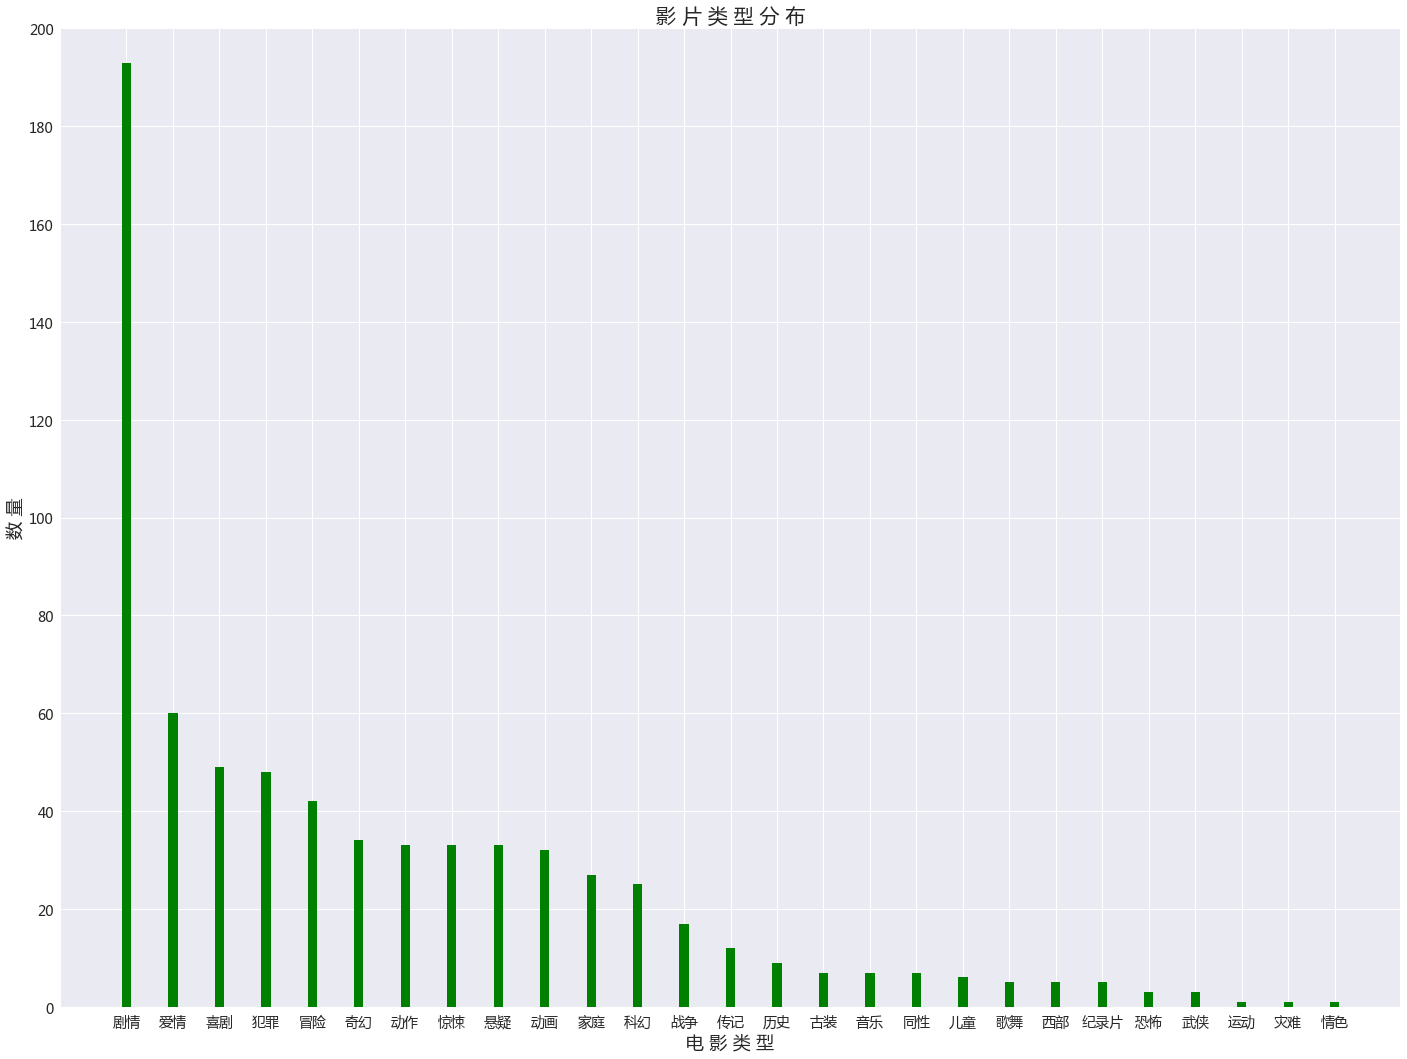

In [9]:
fig,ax = plt.subplots(figsize=(24,18))
ax.bar(np.arange(start=0,stop=4*len(typedict),step=4),typedict.values(),tick_label=typedict.keys(),fc='g',alpha=1,width=0.8)
ax.set_xticklabels(typedict.keys(),size=14)
ax.set_yticks(np.arange(0,201,20))
ax.set_yticklabels(np.arange(0,201,20),size=14)
ax.set_ylim(ymax=200)
ax.set_xlabel('电 影 类 型',size=18)
ax.set_ylabel('数 量',size=18)
title = '影 片 类 型 分 布'
ax.set_title(title,size=20)
fig.savefig(title)
plt.show()

剧情片大当其道,本身也是因为每个电影基本都可以打上“剧情”的标签，“爱情”，”喜剧“的电影更受欢迎，人们还是愿意更多的在电影里看到美好的东西。

## 关于电影年代的分析

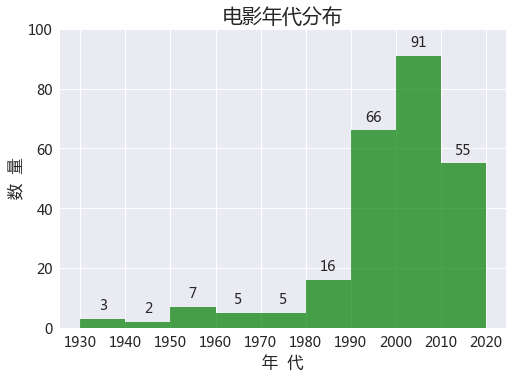

In [10]:
fig, ax = plt.subplots()
bins = np.arange(1930,2021,10)
ax.set_xticks(bins)
ax.set_xticklabels(bins,size=14)
n,bins,patches = ax.hist(movies_genres['Year'],bins=bins,fc='g',alpha=0.7)
for i in range(len(n)):
    ax.text(bins[i]+5,n[i]+3,int(n[i]),size=14,horizontalalignment='center')
ax.set_yticks(np.arange(0,101,20))
ax.set_yticklabels(np.arange(0,101,20),size=14)
ax.set_xlabel('年  代',size=16)
ax.set_ylabel('数  量',size=16)
title = '电影年代分布'
ax.set_title(title,size=20)
ax.grid(True)
fig.savefig(title)
plt.show()

得益于电影技术和表现手法的成熟，优质电影分布在20世纪90年代以后。

> 豆瓣用户每天都在对“看过”的电影进行“很差”到“力荐”的评价，豆瓣根据每部影片看过的人数以及该影片所得的评价等综合数据，通过算法分析产生豆瓣电影 Top 250。

可见豆瓣电影TOP250并不是一成不变的，它会结合新近的热门电影做出调整，如《看不见的客人》，《二十二》等。
近期的电影受商业宣传的影响，评分可能会出现虚高。结合经验，2010年以后的“喜剧”“动画”题材的电影有可能属于短期热度型的电影，最后在时间的冲刷下被淘汰。


In [11]:
moviefilter = (movies_genres['Year']>=2010) & (movies_genres['Genre_喜剧']*movies_genres['Genre_动画']==1)
print("未来有极大可能被淘汰的电影:")
(movies[moviefilter].loc[:,['Rank','Title','Year']])

未来有极大可能被淘汰的电影:


,Rank,Title,Year
63,64,疯狂动物城,2016
108,109,驯龙高手,2010
117,118,神偷奶爸,2010
130,131,疯狂原始人,2013
148,149,玩具总动员3,2010
169,170,超能陆战队,2014
223,224,无敌破坏王,2012
240,241,头脑特工队,2015


## 影片时长

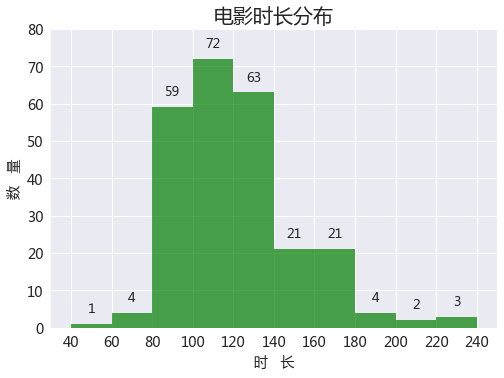

In [12]:
fig, ax = plt.subplots()
bins = np.arange(40,241,20)
ax.set_xticks(bins)
ax.set_xticklabels(bins,size=14)
ax.set_yticks(np.arange(0,81,10))
ax.set_yticklabels(np.arange(0,81,10),size=14)
ax.set_ylim(ymax=80)
n, bins, patches = ax.hist(movies_genres.Last,bins=bins,fc='g',alpha=0.7)
for i in range(len(n)):
    ax.text(bins[i]+10,n[i]+3,int(n[i]),size=13,horizontalalignment='center')
ax.set_xlabel('时   长',size=14)
ax.set_ylabel('数   量',size=14)
title = '电影时长分布'
ax.set_title(title,size=20)
fig.savefig(title)
plt.show()

影片的时长主要集中在两个小时的时间，与现在观众的观影习惯基本一致。

In [13]:
print('时间最长的电影<<%s>>,时长%d分钟;时间最短的电影<<%s>>,时长%d分钟' 
      % (movies.loc[movies['Last'].idxmax(),'Title'],movies['Last'].max(),
         movies.loc[movies['Last'].idxmin(),'Title'],movies['Last'].min()))

时间最长的电影<<乱世佳人>>,时长238分钟;时间最短的电影<<萤火之森>>,时长45分钟


## 制片国家或地区

In [14]:
countrieslist = [x.split() for x in movies_genres.CountryOrRegion]
countrydict = {}
for countries in countrieslist:
    for country in countries:
        if country in countrydict.keys():
            countrydict[country]+=1
        else:
            countrydict[country]=1
# 电影《黄金三镖客》的制片国家中包含西德，将其合并到德国。
countrydict['德国'] += countrydict['西德']
del countrydict['西德']

In [15]:
countryinfo = pd.DataFrame(countrydict,index=np.arange(1)).T

In [16]:
countryinfo.columns = ['count']
countryinfo=countryinfo.sort_values('count',ascending=False)

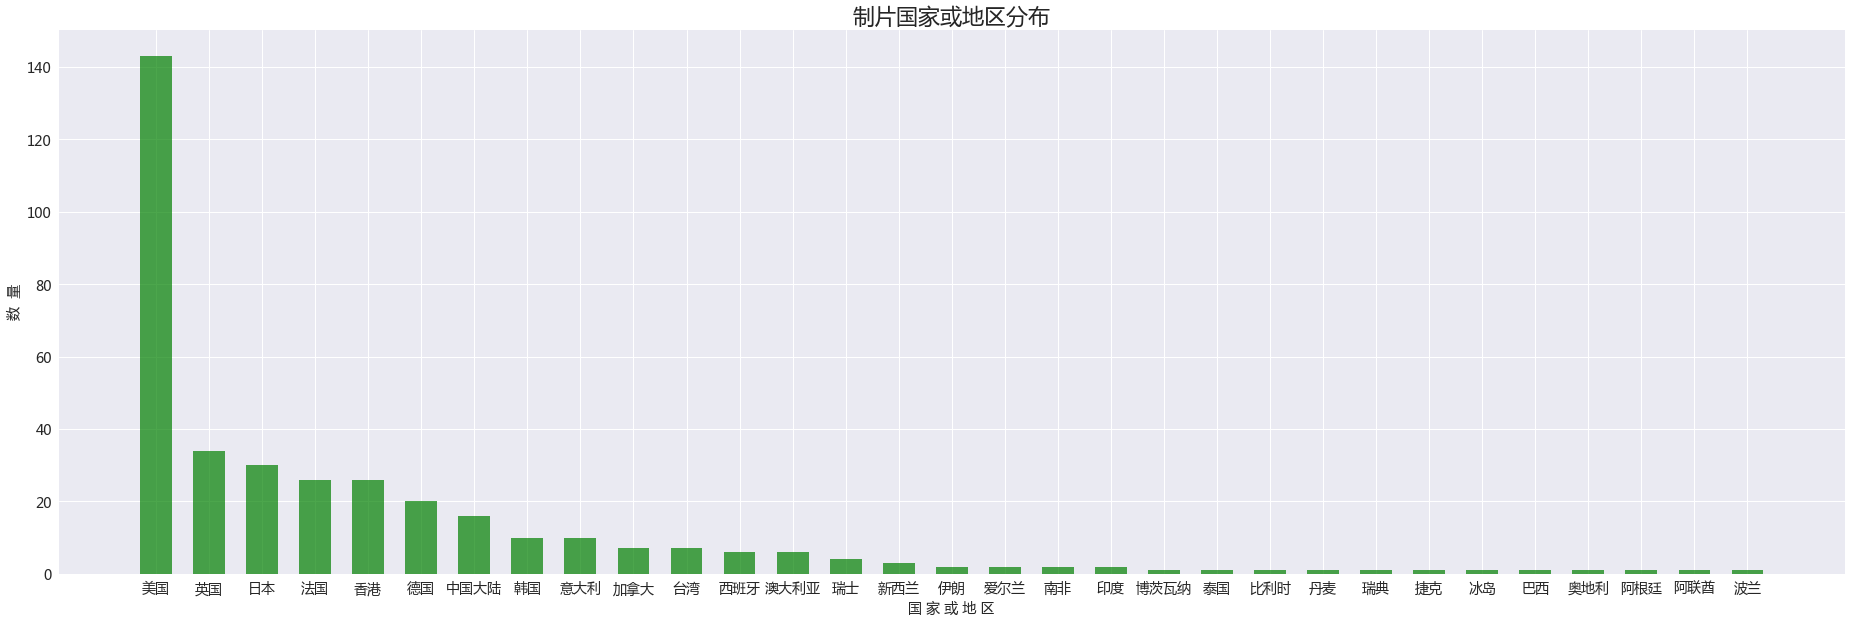

In [17]:
fig, ax = plt.subplots(figsize=(32,10))
ax.bar(np.arange(len(countryinfo)),countryinfo['count'],width=0.6,fc='g',alpha=0.7)
ax.set_xticks(np.arange(len(countryinfo)))
ax.set_xticklabels(countryinfo.index,size=14)
ax.set_yticks(np.arange(0,160,20))
ax.set_yticklabels(np.arange(0,160,20),size=14)
ax.set_xlabel('国 家 或 地 区',size=14)
ax.set_ylabel('数  量',size=14)
title = '制片国家或地区分布'
ax.set_title(title,size=22)
fig.savefig(title)
plt.show()

美帝作为意识形态输出大国，牢牢把握住榜首，英国，法国，德国也是优质电影出口国，日本，香港还会有近邻效应加成。

本来想用Python中Basemap来绘制一幅地图，来更加清楚地展现电影出产地的分布。

再做一个影片出产地之间的关联分析，看看哪些国家之间文化交流更加频繁。

无奈BaseMap实在是太难用了，改天用ArcMap把这一块内容补上。

## 投票数 

In [18]:
Top10Votes=movies_genres.sort_values(by=['Votes'],ascending=False).head(10)
# 此时的数据还保留的原始的索引号，因此需要重新设置
Top10Votes=Top10Votes.reset_index(drop=True)

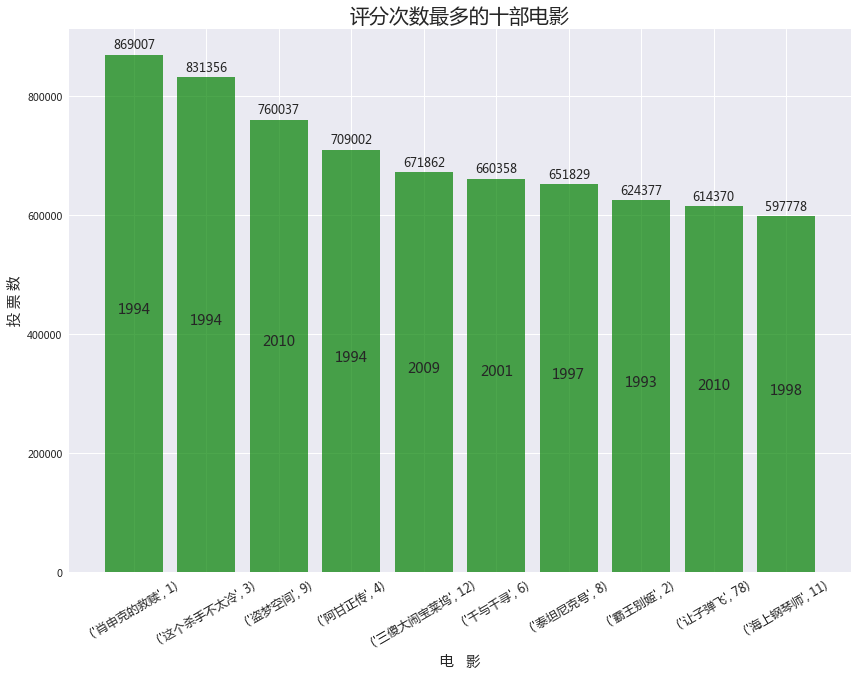

In [19]:
fig, ax = plt.subplots(figsize=(14,10))
ax.bar(np.arange(len(Top10Votes)),Top10Votes.Votes,fc='g',alpha=0.7)
ax.set_xticks(np.arange(len(Top10Votes)))
ax.set_xticklabels(zip(Top10Votes.Title,Top10Votes.Rank),size=12,rotation=30)
for i in range(len(Top10Votes)):
    ax.text(i,Top10Votes.loc[i,'Votes']+10000,Top10Votes.loc[i,'Votes'],size=12,horizontalalignment='center')
for i in range(len(Top10Votes)):
    ax.text(i,Top10Votes.loc[i,'Votes']/2,Top10Votes.loc[i,'Year'],size=14,horizontalalignment='center')
ax.set_xlabel('电   影',size=14)
ax.set_ylabel('投 票 数',size=14)
title = "评分次数最多的十部电影"
ax.set_title(title,size=20)
fig.savefig(title)
plt.show()

评分最多的前十位电影比较符合预期，与排名有很好的相关性，排名越高的电影，越会吸引人去看，从而评分次数越多。

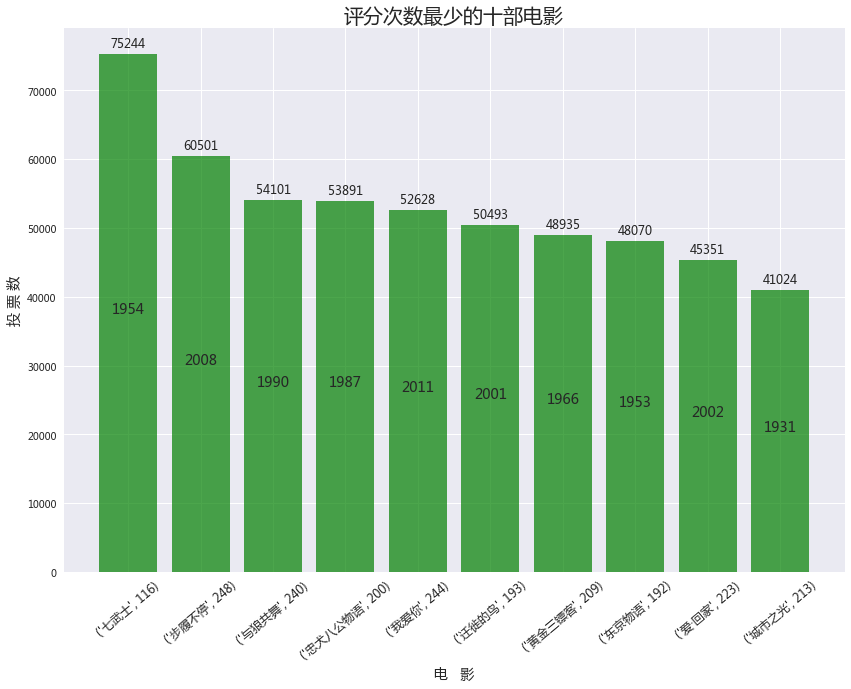

In [20]:
#评分次数最少的十部电影
bootm10Votes=movies_genres.sort_values(by=['Votes'],ascending=False).tail(10)
# 此时的数据还保留的原始的索引号，因此需要重新设置
bootm10Votes=bootm10Votes.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(14,10))
ax.bar(np.arange(len(bootm10Votes)),bootm10Votes.Votes,fc='g',alpha=0.7)
ax.set_xticks(np.arange(len(bootm10Votes)))
ax.set_xticklabels(zip(bootm10Votes.Title,bootm10Votes.Rank),size=12,rotation=40)
for i in range(len(bootm10Votes)):
    ax.text(i,bootm10Votes.loc[i,'Votes']+1000,bootm10Votes.loc[i,'Votes'],size=12,horizontalalignment='center')
for i in range(len(Top10Votes)):
    ax.text(i,bootm10Votes.loc[i,'Votes']/2,bootm10Votes.loc[i,'Year'],size=14,horizontalalignment='center')
ax.set_xlabel('电   影',size=14)
ax.set_ylabel('投 票 数',size=14)
title = "评分次数最少的十部电影"
ax.set_title(title,size=20)
fig.savefig(title)
plt.show()

评分次数最少的十部电影的排名相对靠后，有一部分电影是因为出品太过久远，导致评论次数较少，影片本身的质量还是过硬的。

## 导演，编剧，演员 

这部分主要是看哪个导演（编剧，演员）导（编，演）的电影入榜次数最多。

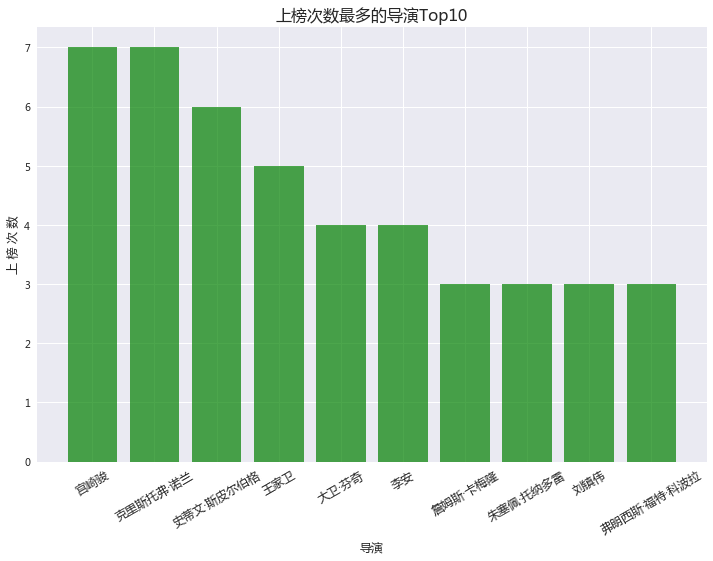

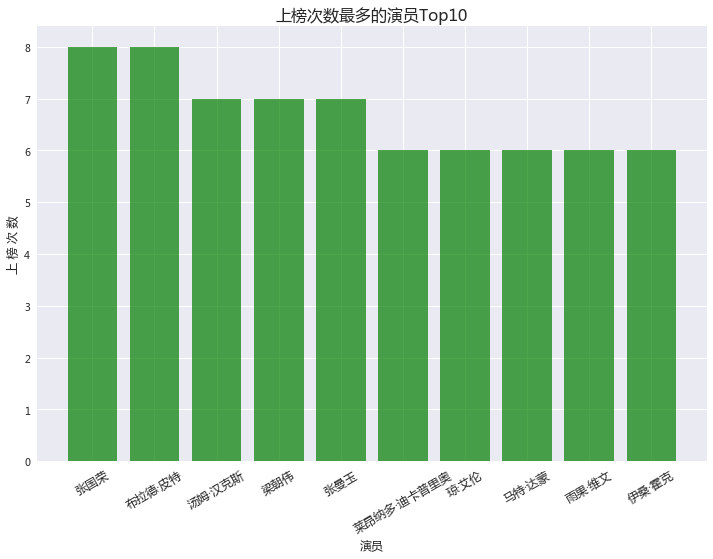

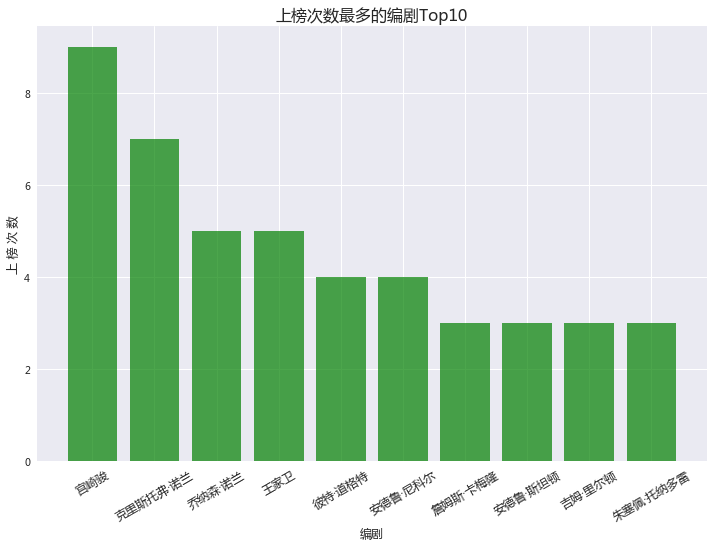

In [21]:
keywords = {'Direction':'导演','Actors':'演员','ScreenWriter':'编剧'}
for key,value in keywords.items():
    keywordslist = [str(x).split() for x in movies_genres[key] if x is not None]
    keywordsdict = dict()
    for keywords in keywordslist:
        for keyword in keywords:
            if keyword in keywordsdict.keys():
                keywordsdict[keyword]+=1
            else:
                keywordsdict[keyword]=1
    keywordsdict = dict(sorted(keywordsdict.items(),key = lambda i:i[1],reverse=True))
    n = 10
    fig, ax = plt.subplots(figsize=(12,8))
    ax.bar(np.arange(n),list(keywordsdict.values())[:n],fc='g',alpha=0.7)
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(list(keywordsdict.keys())[:n],rotation=30,size=12)
    ax.set_xlabel(value,size=12)
    ax.set_ylabel('上 榜 次 数',size=12)
    title = '上榜次数最多的%sTop10' % value
    ax.set_title(title,size=16)
    fig.savefig(title)
    plt.show()

宫崎骏老爷爷和诺兰大神果然厉害，既编又导。斯皮尔伯格是好莱坞的商业大片大师，导演Top10中自然也有很多华人导演。科波拉是因为教父三部曲而上榜，在同时入围编剧和导演榜中的还有一位意大利导演——朱塞佩·托纳多雷。

In [22]:
# 看看这位导演曾经导演过哪些电影
moviefilter = movies_genres.Direction.str.contains('朱塞佩·托纳多雷') 
movies_genres[moviefilter].iloc[:,:8]

,Rank,Title,Score,MovieTypes,Year,Last,CountryOrRegion,Votes
10,11,海上钢琴师,9.2,剧情 音乐,1998,165,意大利,597778
19,20,天堂电影院,9.1,剧情 爱情,1988,155,意大利 法国,308927
73,74,西西里的美丽传说,8.7,剧情 情色 战争,2000,109,意大利 美国,342288


这三部电影基本都看过，导演的名字却没有记住。。。

演员Top10中上榜的华人演员都是香港人，也有点尬。